In [70]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
import sklearn
print(sklearn.__version__)


1.3.1


In [66]:
df = pd.read_csv('regression_data.csv')
df= df.iloc[1:, 0]
train = df.iloc[:-3]
test = df.iloc[-3:]
yframe = pd.DataFrame({'Year': range(2003, 2012)})
train_data = pd.Series(train.values)
y_data = pd.Series(yframe.values.flatten().tolist(), name='Year')


In [67]:
train_data = train_data.str.replace(',', '').astype(float)
df = pd.DataFrame({'X': train_data, 'Year': y_data})
X_train, X_test, y_train, y_test = train_test_split(df[['Year']], df['X'], test_size=0.2, random_state=42)
degree = 2
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)
ridge_model = Ridge(alpha=0.1) 
ridge_model.fit(X_train_poly, y_train)
y_pred_poly = ridge_model.predict(X_test_poly)

mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f'Mean Squared Error (Polynomial Regression): {mse_poly}')
print(f'R-squared (Polynomial Regression): {r2_poly * 100:.2f}%')



Mean Squared Error (Polynomial Regression): 577767.6109833014
R-squared (Polynomial Regression): 92.78%


c:\Users\dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


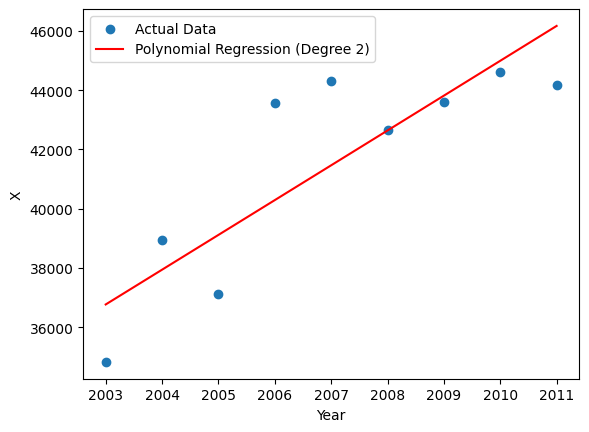

In [68]:
X_plot = np.linspace(min(df['Year']), max(df['Year']), 100).reshape(-1, 1)
X_plot_poly = poly_features.transform(X_plot)
y_plot_poly = ridge_model.predict(X_plot_poly)

plt.scatter(df['Year'], df['X'], label='Actual Data')
plt.plot(X_plot, y_plot_poly, color='red', label=f'Polynomial Regression (Degree {degree})')
plt.xlabel('Year')
plt.ylabel('X')
plt.legend()
plt.show()

In [69]:
year_to_predict = 2022  
X_to_predict_poly = poly_features.transform(np.array([[year_to_predict]]))
predicted_X_poly = ridge_model.predict(X_to_predict_poly)
print(f'Predicted X for {year_to_predict} (Polynomial Regression): {predicted_X_poly[0]}')

Predicted X for 2022 (Polynomial Regression): 59154.84169049049


c:\Users\dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
